**Сравнение численных методов для решения дифференциальных уравнений при 
моделировании ХТП**

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import pandas as pd

Дифференциальное уравнение: $y' = -5ty$

In [2]:
def function(t, y):
    return -5.0 * y * t

Начальные условия: $y(0)=1$, при  $t∈(0;1)$

In [3]:
y0 = 1
t0 = 0

**Метод Эйлера**

$y_{i+1} = y_i + h * function(t_i, y_i)$

In [4]:
# n - кол-во итераций, h - шаг, (t, y0) - начальная точка
def Euler(n, h, t, y0):
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * function(t, y[i])
        t += h
    return y

**Аналитическое решение**

$y_i = \exp(\frac{-5t_i^2}{2})$

In [5]:
def Analytic (n, t):
    yAnalytic = np.zeros(n+1)
    for i in range(n+1):
        yAnalytic[i] = np.exp(-5 * ((t[i] ** 2) / 2))
    return yAnalytic

In [6]:
dT = widgets.BoundedFloatText(min=0,
                              max=1.0,
                              step=0.001,
                              description='Δt:',
                              disabled=False)
butCalculate = widgets.Button(description="Расчёт",
                              button_style='success',
                              disabled=False)

BoundedFloatText(value=0.1, description='Δt:', max=1.0, step=0.001)

Button(button_style='success', description='Расчёт', style=ButtonStyle())

       Δt  Метод Эйлера  Аналитическое решение       σ, %
0  0.0001      0.082071               0.082085   0.016669
1  0.0002      0.082058               0.082085   0.033344
2  0.0010      0.081948               0.082085   0.166945
3  0.0020      0.081810               0.082085   0.334450
4  0.0100      0.080694               0.082085   1.695090
5  0.0200      0.079253               0.082085   3.449714
6  0.1000      0.065473               0.082085  20.237670
8  0.1000      0.065473               0.082085  20.237670
7  0.2000      0.038400               0.082085  53.219223
     Δt  Метод Эйлера  Аналитическое решение
0   0.0      1.000000               1.000000
1   0.1      1.000000               0.975310
2   0.2      0.950000               0.904837
3   0.3      0.855000               0.798516
4   0.4      0.726750               0.670320
5   0.5      0.581400               0.535261
6   0.6      0.436050               0.406570
7   0.7      0.305235               0.293758
8   0.8      0.

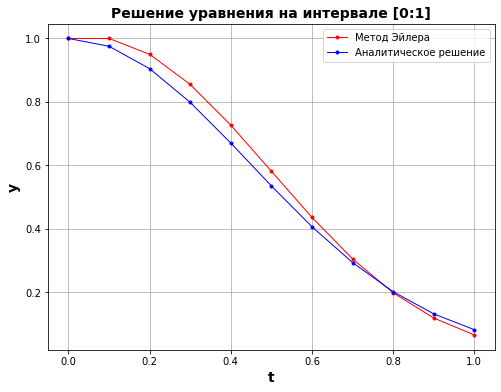

In [7]:
display(dT)
display(butCalculate)

dfError = pd.DataFrame({
        "Δt": pd.Series(dtype='float64'),
        "Метод Эйлера": pd.Series(dtype='float64'),
        "Аналитическое решение": pd.Series(dtype='float64'),
        "σ, %": pd.Series(dtype='float64'),
    })

def on_button_clicked(event):
    global dfCompare
    
    clear_output()
    
    display(dT)
    display(butCalculate)
    
    #Δt
    deltaT = dT.value

    # кол-во итераций
    steps = int(1 / deltaT)

    time = np.linspace(t0, 1, steps + 1)

    yEuler = Euler(steps, deltaT, t0, y0)
    yAnalitic = Analytic(steps, time)
    
    dfCompare = pd.DataFrame({
        "Δt": pd.Series(time),
        "Метод Эйлера": pd.Series(yEuler),
        "Аналитическое решение": pd.Series(yAnalitic),
    })
    
    dfError.loc[len(dfError.index)] = [dfCompare['Δt'][1],
                                       dfCompare['Метод Эйлера'][steps],
                                       dfCompare['Аналитическое решение'][steps],
                                       np.abs((1-(dfCompare['Метод Эйлера'][steps] / 
                                                  dfCompare['Аналитическое решение'][steps])) * 100)]
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # график
    ax.grid()  # сетка
    #  Добавляем подписи к осям:
    ax.set_title('Решение уравнения на интервале [0:1]',
                 fontsize=14,
                 fontweight='bold')
    ax.set_xlabel('t',
                  fontsize=14,
                  fontweight='bold')
    ax.set_ylabel('y',
                  fontsize=14,
                  fontweight='bold')
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Метод Эйлера'].values,
            ".-",
            lw=1,
            color='red',
            label='Метод Эйлера')  
    ax.plot(dfCompare['Δt'].values,
            dfCompare['Аналитическое решение'].values,
            ".-",
            lw=1,
            color='blue',
            label='Аналитическое решение',)  
    plt.legend()
    
    print(dfError.sort_values(by=['Δt']))
    print(dfCompare)
    
    plt.show()
    
butCalculate.on_click(on_button_clicked)

In [9]:
from IPython.display import display_html

dfError2 = dfError.copy(deep=True)
dfError2.set_index('Δt', inplace=True)

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
display_side_by_side(dfCompare,dfError2.sort_index())

,Δt,Метод Эйлера,Аналитическое решение
0,0.0,1.000000,1.000000
1,0.1,1.000000,0.975310
2,0.2,0.950000,0.904837
3,0.3,0.855000,0.798516
4,0.4,0.726750,0.670320
5,0.5,0.581400,0.535261
6,0.6,0.436050,0.406570
7,0.7,0.305235,0.293758
8,0.8,0.198403,0.201897
9,0.9,0.119042,0.131994


**Вывод**

С уменьшением шага приращения *Δt* уменьшается *величина относительной погрешности*, а значит, повышается *точность расчета*.

При уменьшение значение *Δt* в 10 раз (0.01 → 0.001) значение *относительной погрешности* уменьшается также ~ в 10 раз     <br/> (1.695090 % → 0.166945 %). <br/> При изменение (0.01 → 0.0001) ~ в 100 раз (1.695090 % → 0.016669 %). То есть размер шага и ошибка для метода Эйлера связаны линейно.
